# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df_dummies = pd.read_csv('df_dummies.csv')
df_dummies.head()

,qtd_filhos,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,0,0,0,2.0,0,1,1,1,...,1,1,0,0,0,1,0,0,0,0
1,0,1,0,1,1,1.0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
2,0,1,0,1,1,1.0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
3,0,1,1,1,1,2.0,0,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,0,2.0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [3]:
# definindo y (variável resposta) e X (variáveis explicativas)
y = df_dummies.mau

X = df_dummies.drop('mau', axis=1)

In [4]:
# separando o conjunto de dados entre treino e teste a uma proporção de 70%/30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [5]:
# definindo um objeto com a função da decision tree
clf = DecisionTreeClassifier(random_state=100)

In [6]:
# treinando o modelo
clf = clf.fit(X_train, y_train)

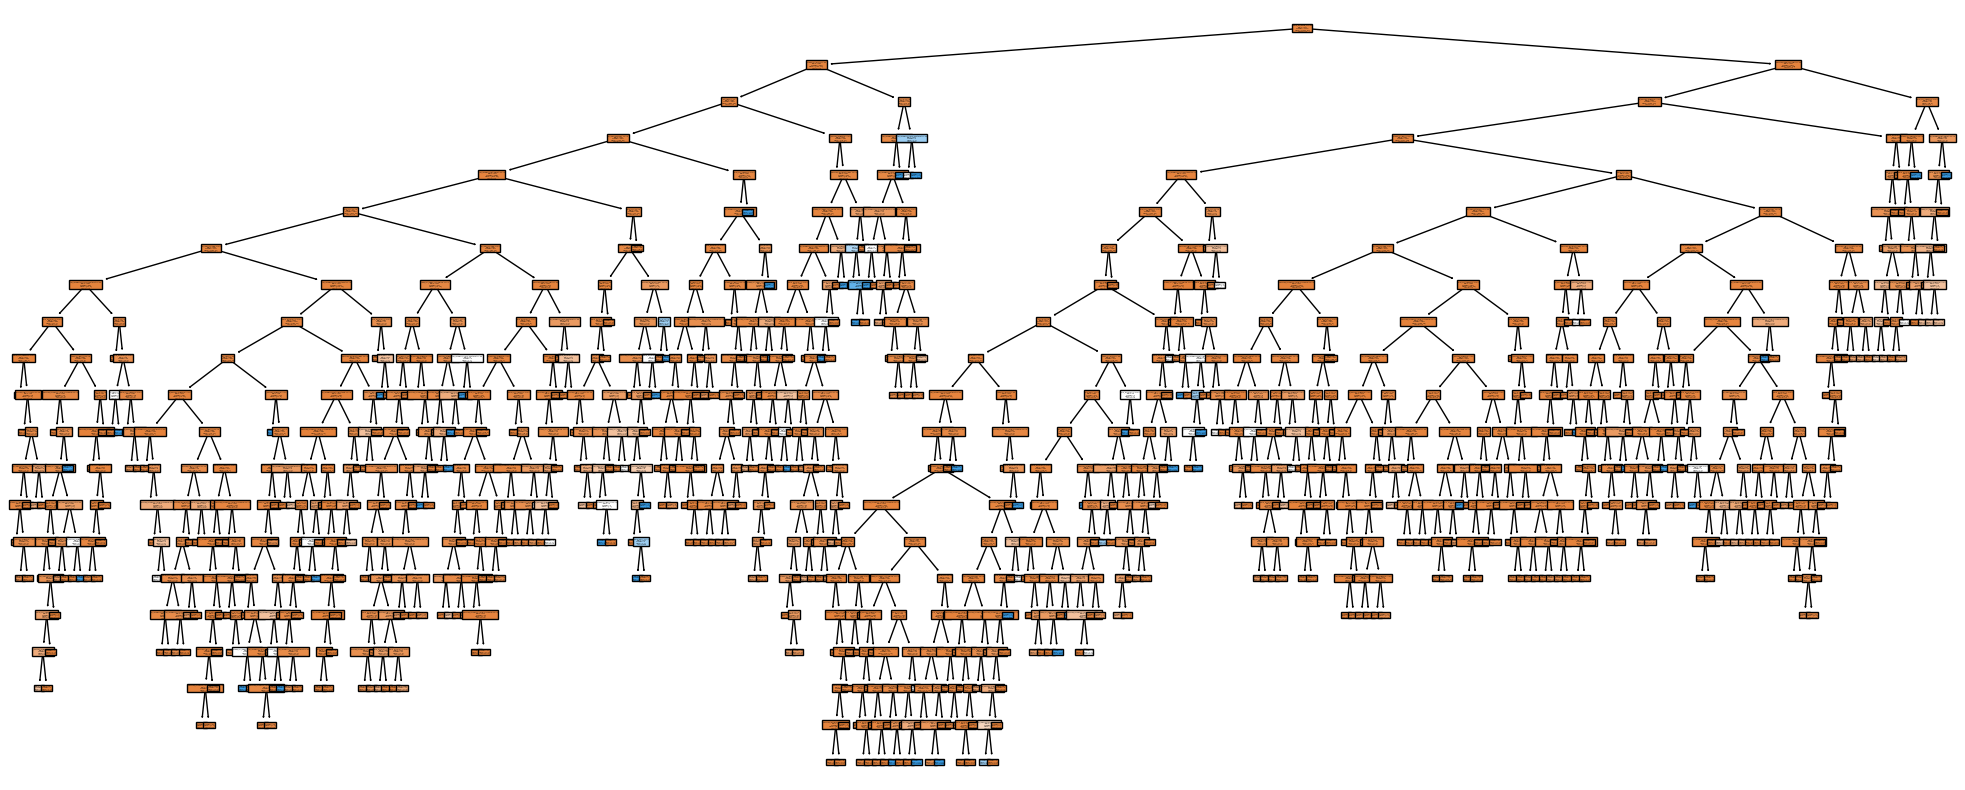

In [7]:
# vizualizando a árvore
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['bom', 'mau'],
          feature_names=X_train.columns);

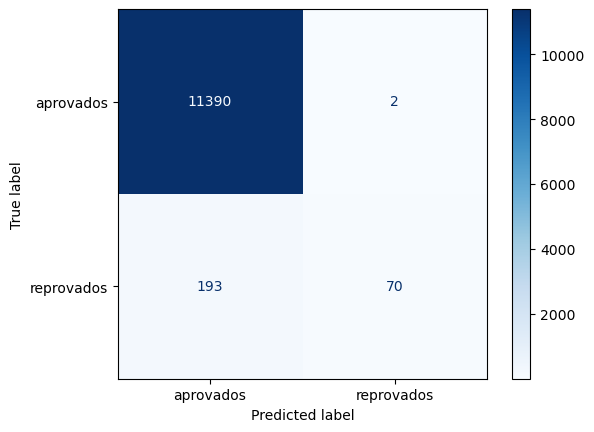

In [8]:
# vizualizando a matriz de confusão
y_hat_train = clf.predict(X_train)

cm_train = confusion_matrix(y_train, y_hat_train)

matriz_de_confusão_treino = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['aprovados', 'reprovados'])
matriz_de_confusão_treino.plot(cmap='Blues')

plt.show()

In [9]:
# calculando a acurácia
accuracy_score(y_train, y_hat_train)

0.9832689832689833

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [10]:
# classificando a base de teste
clf = clf.fit(X_test, y_test)

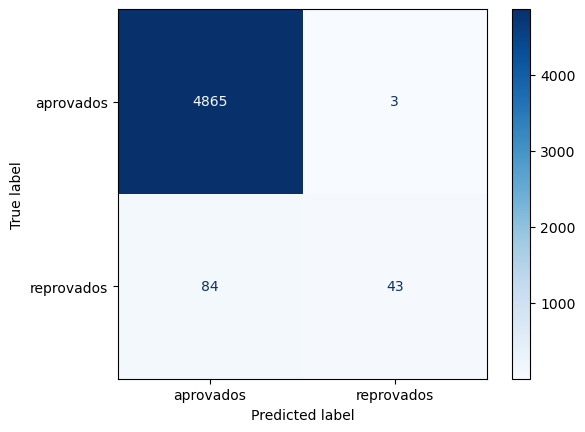

In [11]:
# vizualizando a matriz de confusão
y_hat_test = clf.predict(X_test)

cm_test = confusion_matrix(y_test, y_hat_test)

matriz_de_confusão_treino = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['aprovados', 'reprovados'])
matriz_de_confusão_treino.plot(cmap='Blues')

plt.show()

In [12]:
# calculando a acurácia
accuracy_score(y_test, y_hat_test) 

0.9825825825825826

In [13]:
# comparando as acurácias
print(f'A acurácia do modelo no conjunto de treino foi de {accuracy_score(y_train, y_hat_train) * 100:.1f}% enquanto a do modelo de teste foi de {accuracy_score(y_test, y_hat_test) * 100:.1f}%, ou seja, 1,1% a menos que a de treino')

A acurácia do modelo no conjunto de treino foi de 98.3% enquanto a do modelo de teste foi de 98.3%, ou seja, 1,1% a menos que a de treino


In [14]:
# treinando nova árvore
clf_novo = DecisionTreeClassifier(
    min_samples_leaf=5,
    max_depth=10,
    random_state=123
)

clf_novo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

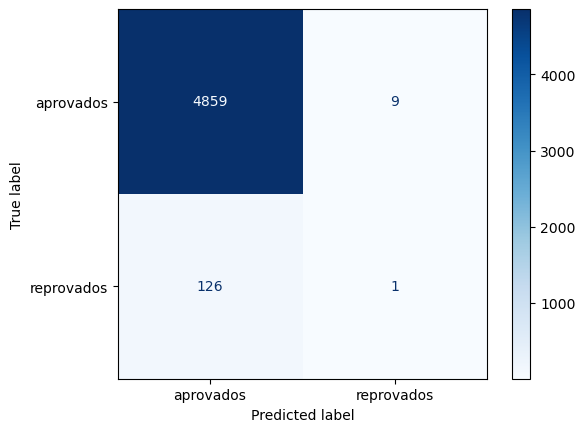

In [15]:
# avaliando a matriz de confusão
y_hat_novo = clf_novo.predict(X_test)

cm_novo = confusion_matrix(y_test, y_hat_novo)

matriz_de_confusão_nova = ConfusionMatrixDisplay(confusion_matrix=cm_novo, display_labels=['aprovados', 'reprovados'])
matriz_de_confusão_nova.plot(cmap='Blues')
plt.show()